In [1]:
import numpy as np
import pandas as pd
import os
import csv
import cv2 as cv

In [2]:
# Read the file containing image labels
file_path_label = '../../diabetic/Diabetic-Retinopathy-Detection/archive/trainLabels_cropped.csv'
home_data_label = pd.read_csv(file_path_label)


In [3]:
# Import necessary modules for machine learning tasks
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex3 import *

print("Setup Complete")


Setup Complete


In [4]:

# Set the directory path and read the image labels
dir_name = '../../diabetic/Diabetic-Retinopathy-Detection/archive/resized_train_cropped/resized_train_cropped/'
directory = os.fsencode(dir_name)


train_Labels = pd.read_csv('../../diabetic/Diabetic-Retinopathy-Detection/archive/trainLabels_cropped.csv')
labels = pd.read_csv('../../diabetic/Diabetic-Retinopathy-Detection/archive/trainLabels_cropped.csv', names=['level'])

# Create a .csv file to store the calculated features for decision tree
header = ['nameImg', 'meanR', 'meanG', 'meanB', 'devR', 'devG', 'devB', 'class']


In [5]:
# with open('./csv_features', 'w', encoding='UTF8') as f:
#
#     writer = csv.writer(f)
#     writer.writerow(header)
#     for file in os.listdir(directory):
#         filename = os.fsdecode(file)
#         filename_base = os.path.basename(filename)
#         if filename_base.endswith('.jpeg'):
#             index = train_Labels.index
#             condition = train_Labels["image"] == filename_base[:-5]
#             indx = index[condition]
#             classImg = train_Labels["level"].loc[indx]
#             level = classImg.tolist()
#             img = cv.imread(dir_name+filename_base)
#             norm_img = cv.imread(dir_name+filename)
#             final_img = cv.normalize(img, norm_img, 0, 255, cv.NORM_MINMAX)
#             means, dev = cv.meanStdDev(final_img)
#             f1_0 = means[0]
#             f1_1 = means[1]
#             f1_2 = means[2]
#             f2_0 = dev[0]
#             f2_1 = dev[1]
#             f2_2 = dev[2]
#             data = [filename, *f1_0, *f1_1, *f1_2, *f2_0, *f2_1, *f2_2, *level]
#             writer.writerow(data)
#             continue
#         else:
#             continue

In [34]:
# Read the CSV file containing the calculated features
csv_data = pd.read_csv('csv_features' )
csv_data.head()

,nameImg,meanR,meanG,meanB,devR,devG,devB,class
0,17495_right.jpeg,58.662523,78.488593,106.789466,27.344116,36.864961,51.908253,1
1,35236_right.jpeg,95.724635,155.751600,202.723910,41.507478,67.500360,88.042890,0
2,37166_left.jpeg,80.217096,98.371383,139.890633,36.183454,46.520206,71.111794,0
3,17299_left.jpeg,75.486000,85.920939,123.532742,47.423972,55.442443,75.762605,1
4,27929_left.jpeg,50.077889,54.613454,75.822631,35.855830,40.926429,54.865710,0


In [35]:
# Define the features (mean and standard deviation) and the target variable
features = ['meanR', 'meanG', 'meanB', 'devR', 'devG', 'devB']
X = csv_data[features]
y = csv_data['class']


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, confusion_matrix

# Split the data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

# Create a decision tree classifier
decision_tree_model = DecisionTreeClassifier()

# Fit the model on the training data
decision_tree_model.fit(train_X, train_y)

# Make predictions on the validation set
val_predictions = decision_tree_model.predict(val_X)


confusion_matrix_labeled = confusion_matrix(val_y, val_predictions)



# Calculate mean absolute error (MAE)
mae = mean_absolute_error(val_y, val_predictions)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.8002734419505526


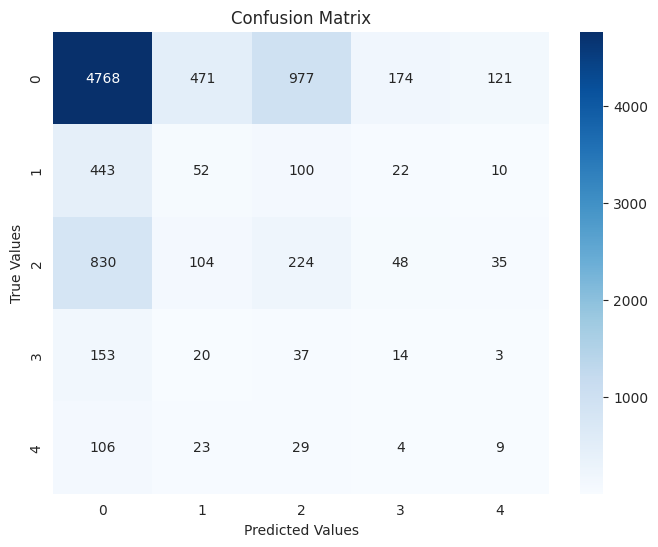

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix for labeled data:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_labeled, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()


In [38]:
# Print actual and predicted values for the first 10 samples
print(val_y[:10])
print(val_predictions[:10])

23613    2
3512     2
9051     0
5437     2
26297    0
23862    0
34989    0
31309    0
2680     2
3321     2
Name: class, dtype: int64
[0 1 0 0 2 0 0 2 0 0]


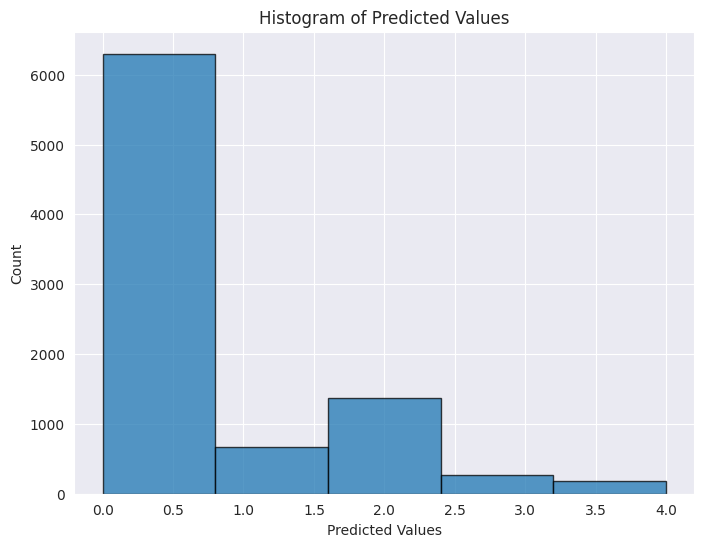

In [65]:

# Plot a histogram of the predicted values:
plt.figure(figsize=(8, 6))
plt.hist(val_predictions, bins=len(np.unique(y)), edgecolor='black', alpha=0.75)
plt.title('Histogram of Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Count')
plt.show()


In [70]:
# Calculate errors (modify to assign 1 or 0)
errors = np.where(val_predictions != val_y, 1, 0)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / val_y)

# Remove NaN and inf values
mape_filtered = mape[np.isfinite(mape)]

# Calculate accuracy
accuracy = 100 - np.mean(mape_filtered)

print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 47.26 %.


In [71]:
# Calculate the model's score on the training and validation sets
print (decision_tree_model.score(train_X, train_y))
print(decision_tree_model.score(val_X, val_y))

1.0
0.5773043181041358


In [15]:
# Create a new CSV file to store the features of a test image
with open('./testImage_features', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(features)

    # Read and normalize a test image
    img = cv.imread(dir_name+'10003_left.jpeg')
    norm_img = img
    final_img = cv.normalize(img, norm_img, 0, 255, cv.NORM_MINMAX)

    # Calculate the features for the test image
    means, dev = cv.meanStdDev(final_img)
    data = [*means[0], *means[1], *means[2], *dev[0], *dev[1], *dev[2]]
    writer.writerow(data)

In [16]:
# Read the features of the test image from the CSV file
csv_data = pd.read_csv('./testImage_features' )
X = csv_data[features]

In [17]:
# Make predictions on the test image
val_predictions = decision_tree_model.predict(X)
print('Level of image: ' + str(val_predictions))

Level of image: [0]


In [18]:
from sklearn.model_selection import GridSearchCV
# Perform a grid search to find the best parameters for the decision tree model
param_grid = {'max_depth': [25,50,75,99]}
grid = GridSearchCV(decision_tree_model, param_grid=param_grid, cv=5)
grid.fit(train_X, train_y)

print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_:.2f}")


Best parameters: {'max_depth': 25}
Best cross-validation score: 0.60


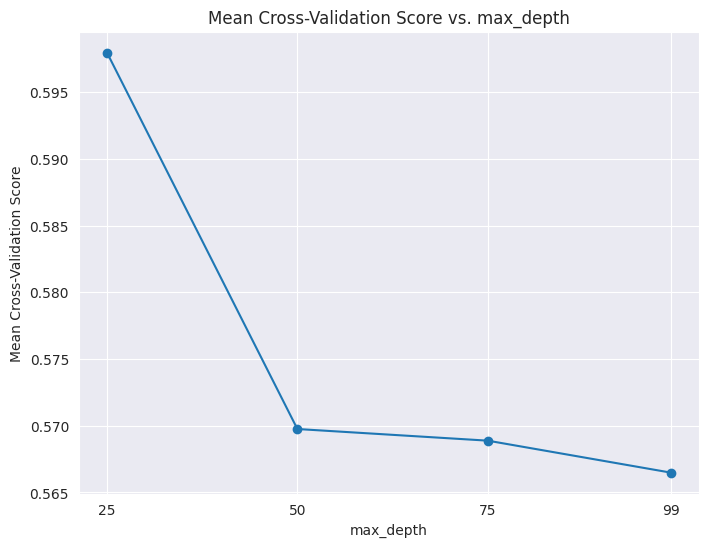

In [19]:
# plot a line graph of the mean cross-validation scores for each max_depth value
max_depth_values = [25,50,75,99]
mean_scores = grid.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, mean_scores, marker='o')
plt.title('Mean Cross-Validation Score vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Mean Cross-Validation Score')
plt.xticks(max_depth_values)
plt.grid(True)
plt.show()